In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from __future__ import print_function
from keras.callbacks import LambdaCallback
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io
import keras
import text_utils

Using TensorFlow backend.


# Define directories, hyperparameter

In [2]:
epoch = 3
lr = 0.001
batch_size = 128

# Load data using TextLoader object

In [3]:
path = 'shakespeare.txt'
text_lo = text_utils.TextLoader()
maxlen, text, indices_char,char_indices, chars,x,y = text_lo.load_words(path)

corpus length: 4573338
total chars: 41
nb sequences: 1524433
Vectorization...


# Create your model object

In [4]:
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=opt)
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end():
    # Function invoked at end of each epoch. Prints generated text.
    #print()
    #print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.5]:
        #print('----- diversity:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        #print('----- Generating with seed: "' + sentence + '"')
        sys.stdout.write(generated)

        for i in range(400):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

Instructions for updating:
Colocations handled automatically by placer.


# Training

In [5]:
history = model.fit(x, y,
          batch_size=128,
          epochs=5,
          
          validation_split=0.1)
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Instructions for updating:
Use tf.cast instead.
Train on 1371989 samples, validate on 152444 samples
Epoch 1/5
1371989/1371989 [==============================] - 501s 365us/step - loss: 1.9772 - val_loss: 1.7726
Epoch 2/5
1371989/1371989 [==============================] - 498s 363us/step - loss: 1.6625 - val_loss: 1.6568
Epoch 3/5
1371989/1371989 [==============================] - 496s 362us/step - loss: 1.5675 - val_loss: 1.6055
Epoch 4/5
1371989/1371989 [==============================] - 497s 362us/step - loss: 1.5153 - val_loss: 1.5794
Epoch 5/5
1371989/1371989 [==============================] - 496s 361us/step - loss: 1.4817 - val_loss: 1.5637


<Figure size 640x480 with 1 Axes>

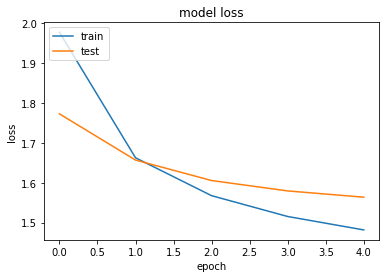

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Generating Text

In [7]:
on_epoch_end()

am:
well, we cannot greatly condemn our man that i am a
more than the dearest thou art be mounted man.

penerius:
speak his further with him what he hath the will her the king
the strike his son of the court in the father,
and the soul in the chance of change, by
the love, the fire and man that free the
words and prest the displession and for me.

king henry v:
then there is the dear to me the say in the country.

gand:
the servention, 
